In [7]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/martin/NeuralFDR2/NeuralFDR2/data_loader.py:278: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  p[i] = np.random.beta(a = 0.3, b = 4)
/home/martin/NeuralFDR2/NeuralFDR2/data_loader.py:279: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  h[i] = 1
/home/martin/NeuralFDR2/NeuralFDR2/data_loader.py:300: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  x1 = np.random.uniform(-1,1,size = n_samples)
/home/martin/NeuralFDR2/NeuralFDR2/data_loader.py:301: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  x2 = np.random.uniform(-1,1,size = n_samples)


## bh testing summary ##
# n_rej = 9903
# t_rej = 0.009903


FDP: 0.07785519539533475 

## sbh summary ##
# n_rej = 11380
# t_rej = 0.014590
# pi_0 estimate = 0.780


FDP: 0.1007029876977153



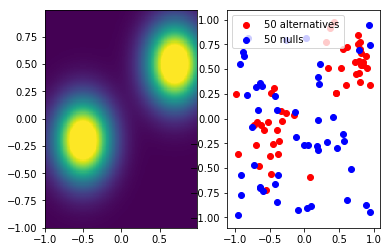

In [8]:
## generating a 1d toy data 
# p,x,h=toy_data_1d(n_sample=100000,vis=1)
p,h,x=load_2DGM(verbose=True)

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,verbose=True)
print('FDP: %s \n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,verbose=True)
print('FDP: %s\n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

In [5]:
_=PrimFDR_cv(p,x,5,alpha=0.1,n_itr=10000,h=None,verbose=True)

TypeError: feature_preprocess() got an unexpected keyword argument 'reorder'

## PrimFDR_init starts
# Learning null distribution
## initialization
Slope: w=0.5, a=[-0.03883301 -0.13649902]
Bump 0: w=0.1, mu=[0.75208786 0.16955602], sigma=[0.15443585 0.1058495 ]
Bump 1: w=0.1, mu=[0.19565349 0.73270303], sigma=[0.13796511 0.15560172]
Bump 2: w=0.1, mu=[0.26185922 0.14725185], sigma=[0.17202587 0.09537678]
Bump 3: w=0.1, mu=[0.57249532 0.872113  ], sigma=[0.20912215 0.08963856]
Bump 4: w=0.1, mu=[0.68303379 0.48431308], sigma=[0.17768337 0.11949589]


Slope: w=0.8179035154818038, a=[-0.03883301 -0.13649902]
Bump 0: w=0.011891851247932666, mu=[0.49492404 0.48492383], sigma=[0.28448676 0.30584914]
Bump 1: w=0.02393220859802104, mu=[0.49492404 0.48492383], sigma=[0.28448676 0.30584914]
Bump 2: w=0.06332585336377135, mu=[0.49488263 0.00969874], sigma=[0.28733381 0.11861084]
Bump 3: w=0.05695395947350112, mu=[0.48728843 1.00988487], sigma=[0.28489681 0.12062231]
Bump 4: w=0.025992611834969998, mu=[0.49492404 0.48492383], sigma=[0.28448676 0.30584914]


# Learning alte

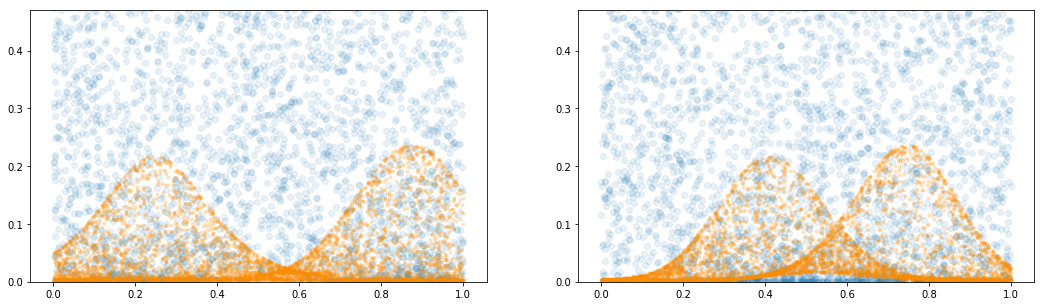

## PrimFDR_init finishes

## optimization paramter:
# n_itr=20000, n_samp=100000, lambda0=351, lambda1=100

## optimization initialization:
# Slope: a=[-0.13649902  0.15646973], b=[-5.607289]
# Bump 0: w=-1.8743714, mu=[0.8675107 0.764587 ], sigma=[0.03911328 0.02503929]
# Bump 1: w=-2.0727916, mu=[0.24669161 0.46499717], sigma=[0.01913824 0.03100187]
# Bump 2: w=-6.3996696, mu=[0.52222604 0.64963657], sigma=[0.18307403 0.02276264]
# Bump 3: w=-1.9975402, mu=[0.24626271 0.37265736], sigma=[0.05713253 0.02556791]
# Bump 4: w=-2.539534, mu=[0.886627  0.6864638], sigma=[0.03561801 0.03751428]


## iteration 0
n_rej:  19338
n_rej sig:  19338.088
FD esti mirror: 2017
FD esti mirror sig: 2055.6616
loss1:  [-0.19338086]
loss2:  [0.12185294]
Estimated FDP: [0.10630119]
FDP: 0.0
Slope: a=[-0.141499    0.15146975], b=[-5.612289]
Bump 0: w=-1.8793714, mu=[0.8725107 0.759587 ], sigma=[0.03911328 0.02503929]
Bump 1: w=-2.0777915, mu=[0.2516916  0.45999718], sigma=[0.01913824 0.03100187]
Bump 2: w=-

In [ ]:
n_rej,t,_=PrimFDR(p,x,5,alpha=0.1,h=None,n_itr=20000,verbose=True)

### Testing 2d GM+LT

Screen Shot 2018-03-02 at 12.10.50 AM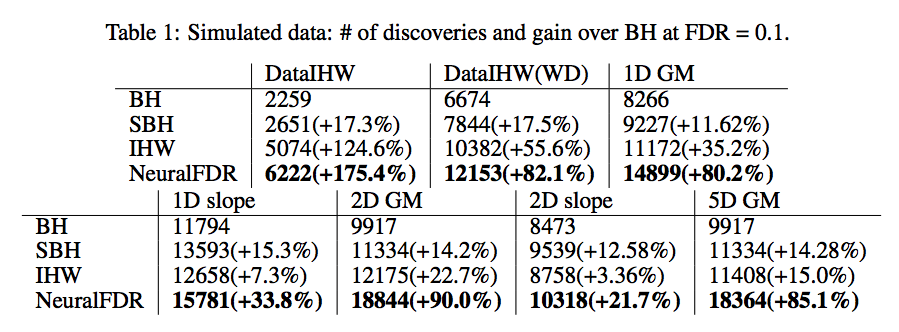

In [3]:
## testing the initialization 
w,a,mu,sigma = ML_init(p,x,3,alpha=0.1,n_itr=100,h=h,verbose=True)

# plt.figure()
# temp=np.linspace(0,1,101)
# plt.hist(x[h==1],bins=50,weights=1/np.sum(h==1)*50*np.ones([np.sum(h==1)]))
# temp = np.linspace(0,1,101)
# plt.plot(temp,f_all(temp,a,mu,sigma,w))
# plt.show()

### ML initialization starts ###

## Learned parameters: ##
Slope: w=0.686407465542, a=[ 0.9376416  -0.42949707]
Bump 0: w=0.136498323903, mu=[ 0.81574845  0.73854095], sigma=[ 0.09285315  0.11146091]
Bump 1: w=0.153519947202, mu=[ 0.25730885  0.38865851], sigma=[ 0.10473719  0.11977248]
Bump 2: w=0.0235742633522, mu=[ 0.54089265  0.35566079], sigma=[ 0.13526127  0.12702442]


## Testing Summary ##
Num of alternatives: 31232.0
Num of discovery: 20855
Num of true discovery: 18836.0
Actual FDP: 0.0968113162311




### Parameters
n_itr=100, n_samp=100000, lambda0=63.5896341778, lambda1=100.0
### ML initialization starts ###

## Learned parameters: ##
Slope: w=0.686407465542, a=[ 0.9376416  -0.42949707]
Bump 0: w=0.136498323903, mu=[ 0.81574845  0.73854095], sigma=[ 0.09285315  0.11146091]
Bump 1: w=0.153519947202, mu=[ 0.25730885  0.38865851], sigma=[ 0.10473719  0.11977248]
Bump 2: w=0.0235742633522, mu=[ 0.54089265  0.35566079], sigma=[ 0.13526127  0.12702442]


## Summary before optimization ##
## Testing Summary ##
Num of alternatives: 31232.0
Num of discovery: 20844
Num of true discovery: 18823.0
Actual FDP: 0.0969583573211


### initialization value ###
Slope: a=[ 0.93764162 -0.42949706], b=[-4.92842531]
Bump 0: w=-3.51253, mu=[ 0.81574845  0.73854095], sigma=[ 0.01724342  0.02484707]
Bump 1: w=-3.58737, mu=[ 0.25730884  0.38865852], sigma=[ 0.02193976  0.0286909 ]
Bump 2: w=-5.77558, mu=[ 0.54089266  0.3556608 ], sigma=[ 0.03659122  0.03227041]


### iteration 0 ###
mean t:  0.0141296
mean

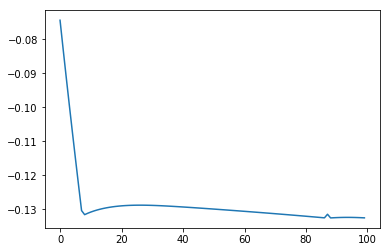

### Summary ###
method: perim_test_1d
# rejections: 21059
FDP: 0.0979153805974
### End Summary ###


In [4]:
## test prim_fdr
n_rej,t=PrimFDR(p,x,3,alpha=0.1,n_itr=100,h=h,verbose=True)
print("### Summary ###")
print("method: perim_test_1d")
print("# rejections: %s"%str(n_rej))
print("FDP: %s"%str( np.sum((h==0)*(p<t))/np.sum(p<t)))
print("### End Summary ###")